In [1]:
##mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def detect_face(image_path, img_size=(92, 112), scaleFactor=1.1, minNeighbors=5):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)

    if len(faces) == 0:
        # print(f"No face detected in {image_path}")
        return None

    # Assume largest face is the correct one
    x, y, w, h = max(faces, key=lambda f: f[2]*f[3])
    face = gray[y:y+h, x:x+w]
    face_resized = cv2.resize(face, img_size)

    return face_resized


In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict

def extract_subject_id(filename):
    return filename.split('-')[0]

def load_dataset(train_dir, test_dir, image_size=(100, 100)):
    X_train, y_train = [], []
    X_test, y_test = [], []
    x_test_paths = []

    label_map = {}
    label_counter = 0

    def process_folder(folder, is_train=True):
        nonlocal label_counter
        X, y, paths = [], [], []

        for fname in sorted(os.listdir(folder)):
            if not fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                continue

            subject_id = extract_subject_id(fname)
            if subject_id not in label_map:
                label_map[subject_id] = label_counter
                label_counter += 1
            label = label_map[subject_id]

            img_path = os.path.join(folder, fname)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Failed to read {img_path}")
                continue

            face = detect_face(img_path)
            if face is None:
                # print(f"No face found in {img_path}")
                continue

            face_resized = cv2.resize(face, image_size)
            X.append(face_resized)
            y.append(label)
            paths.append(img_path)

        return X, y, paths

    X_train, y_train, _ = process_folder(train_dir, is_train=True)
    X_test, y_test, x_test_paths = process_folder(test_dir, is_train=False)

    print(f"Loaded {len(X_train)} training faces.")
    print(f"Loaded {len(X_test)} testing faces.")
    return (np.array(X_train), np.array(y_train),
            np.array(X_test), np.array(y_test),
            label_map, x_test_paths)


In [9]:
dataset_path = "/content/drive/MyDrive/FEI_faces"
testing_path = "/content/drive/MyDrive/FEI_testing"
X_train, y_train, X_test, y_test, label_map, X_test_files = load_dataset(dataset_path, testing_path)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Subjects found: {len(label_map)}")
print(f"Example label map: {label_map}")


Loaded 628 training faces.
Loaded 100 testing faces.
Train samples: 628
Test samples: 100
Subjects found: 150
Example label map: {'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '18': 9, '19': 10, '2': 11, '20': 12, '21': 13, '22': 14, '23': 15, '24': 16, '25': 17, '26': 18, '27': 19, '28': 20, '29': 21, '3': 22, '30': 23, '31': 24, '32': 25, '33': 26, '34': 27, '35': 28, '36': 29, '37': 30, '38': 31, '39': 32, '4': 33, '40': 34, '41': 35, '42': 36, '43': 37, '44': 38, '45': 39, '46': 40, '47': 41, '48': 42, '49': 43, '5': 44, '50': 45, '6': 46, '7': 47, '8': 48, '9': 49, '10a.jpg': 50, '10b.jpg': 51, '11a.jpg': 52, '11b.jpg': 53, '12a.jpg': 54, '12b.jpg': 55, '13a.jpg': 56, '13b.jpg': 57, '14a.jpg': 58, '14b.jpg': 59, '15a.jpg': 60, '15b.jpg': 61, '16a.jpg': 62, '16b.jpg': 63, '17a.jpg': 64, '17b.jpg': 65, '18a.jpg': 66, '18b.jpg': 67, '19a.jpg': 68, '19b.jpg': 69, '1a.jpg': 70, '1b.jpg': 71, '20a.jpg': 72, '20b.jpg': 73, '21a.jpg': 74, '21b.jpg': 75, '

In [10]:
print(X_test_files)

['/content/drive/MyDrive/FEI_testing/10a.jpg', '/content/drive/MyDrive/FEI_testing/10b.jpg', '/content/drive/MyDrive/FEI_testing/11a.jpg', '/content/drive/MyDrive/FEI_testing/11b.jpg', '/content/drive/MyDrive/FEI_testing/12a.jpg', '/content/drive/MyDrive/FEI_testing/12b.jpg', '/content/drive/MyDrive/FEI_testing/13a.jpg', '/content/drive/MyDrive/FEI_testing/13b.jpg', '/content/drive/MyDrive/FEI_testing/14a.jpg', '/content/drive/MyDrive/FEI_testing/14b.jpg', '/content/drive/MyDrive/FEI_testing/15a.jpg', '/content/drive/MyDrive/FEI_testing/15b.jpg', '/content/drive/MyDrive/FEI_testing/16a.jpg', '/content/drive/MyDrive/FEI_testing/16b.jpg', '/content/drive/MyDrive/FEI_testing/17a.jpg', '/content/drive/MyDrive/FEI_testing/17b.jpg', '/content/drive/MyDrive/FEI_testing/18a.jpg', '/content/drive/MyDrive/FEI_testing/18b.jpg', '/content/drive/MyDrive/FEI_testing/19a.jpg', '/content/drive/MyDrive/FEI_testing/19b.jpg', '/content/drive/MyDrive/FEI_testing/1a.jpg', '/content/drive/MyDrive/FEI_testin

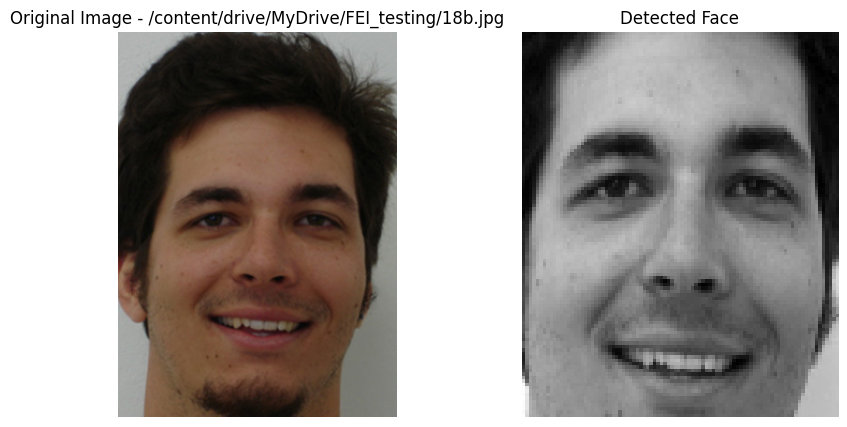

In [12]:
## testing detection on test images bc they aren't cropped yet
image_path = X_test_files[17]  # Pick one test image
detected_face = detect_face(image_path)

if detected_face is not None:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Original Image - {image_path}")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(detected_face, cmap='gray')
    plt.title("Detected Face")
    plt.axis('off')
    plt.show()
